# Communicate Data Findings: Loan Data from Prosper
## by Ilknur Cakir

## Investigation Overview

I try to answer two questions here:

1. What affects the borrower’s APR or interest rate?
2. Are there differences between loans depending on how large the original loan amount was?

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), loan original amount, borrower income, and many others. For this project, I take a subset of features which is 17 variables out of original 81 variables. So the data has 113,937 samples with 17 variables.

In [8]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import matplotlib

%matplotlib inline

In [2]:
dff = pd.read_csv('clean_data.csv')

In [3]:
dff.head()

,Term,BorrowerRate,BorrowerAPR,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,InquiriesLast6Months,DebtToIncomeRatio,LoanOriginalAmount,CurrentCreditLines,LoanStatus,StatedMonthlyIncome,DelinquenciesLast7Years,Income_trans,loan_amount
0,36,0.0920,0.12016,0.0820,7.0,2,CO,Professional,Employed,44.0,3.0,0.18,10000,14.0,Current,6125.000000,0.0,3.787177,4
1,36,0.0974,0.12528,0.0874,9.0,16,GA,Skilled Labor,Employed,113.0,0.0,0.15,10000,5.0,Current,2875.000000,14.0,3.458789,4
2,36,0.2085,0.24614,0.1985,4.0,2,MN,Executive,Employed,44.0,1.0,0.26,15000,19.0,Current,9583.333333,0.0,3.981562,5
3,60,0.1314,0.15425,0.1214,10.0,1,NM,Professional,Employed,82.0,0.0,0.36,15000,21.0,Current,8333.333333,0.0,3.920871,5
4,36,0.2712,0.31032,0.2612,2.0,1,KS,Sales - Retail,Employed,172.0,0.0,0.27,3000,10.0,Current,2083.333333,0.0,3.318967,1


# What affects the borrower’s APR or interest rate? 

## Borrower Rate and Income

There is a negative relationship between income and borrower rate. 

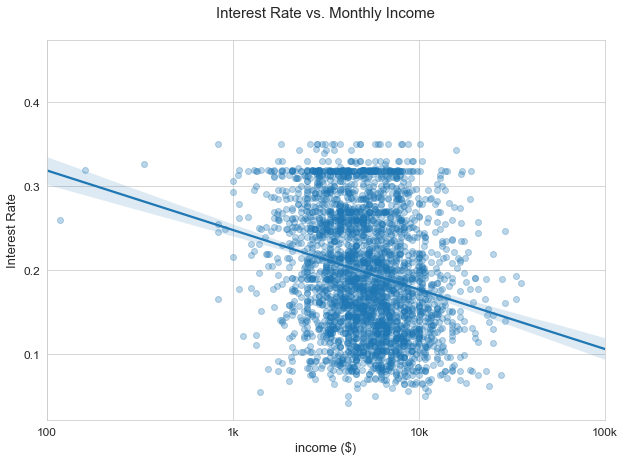

In [5]:
# Regression plot of income and borrower rate. I pick tick values in accordance with
# log-transformed income_trans.

sns.set_style('whitegrid')
plt.figure(figsize = (10, 7))
plot_data = dff.sample(3000, replace = False)
sns.regplot(data = plot_data, x = 'Income_trans', y = 'BorrowerRate', scatter_kws = {'alpha':0.3, 'edgecolor' : None});
plt.title('Interest Rate vs. Monthly Income\n', fontsize = 15)
ticks = np.arange(2, 5+1, 1)
labels = ['100', '1k', '10k', '100k']
plt.xticks(ticks, labels,fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('income ($)', fontsize = 13)
plt.ylabel('Interest Rate', fontsize = 13);
plt.xlim(2, 5);

## Borrower Rate and Credit Risk Score



We have seen that there is a correlation between term and rate so  the relationship between borrower rate and credit risk score is depicted for different term values. As score increases average rate values decrease. The last regression plots show that this relationship does not change for different term values.

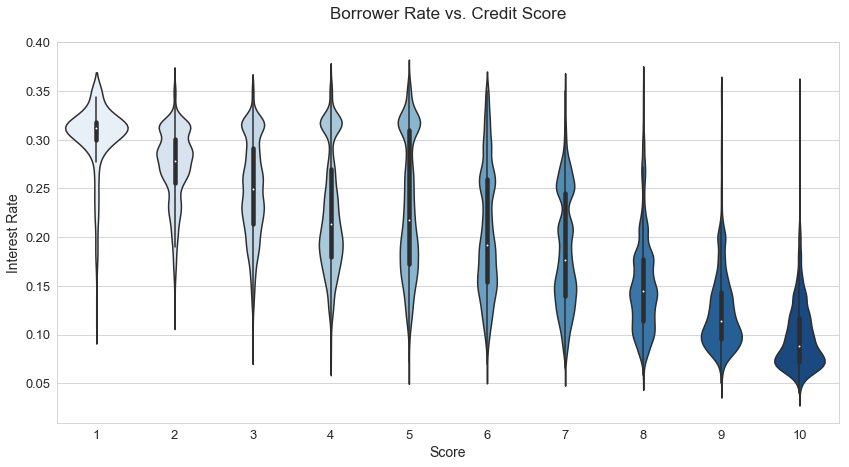

In [6]:
# Violin plot for risk score and interest rate. 
plt.figure(figsize= (14, 7))
sns.violinplot(data = dff, x = 'ProsperScore',  y = 'BorrowerRate', palette = 'Blues');
plt.title('Borrower Rate vs. Credit Score\n', fontsize = 17);
plt.xlabel('Score', fontsize = 14)
plt.ylabel('Interest Rate', fontsize = 14 );

# Polishing graph. Represent risk scores as an integer instead of float, 10 instead of 10.0 on the graph 
ticks = np.arange(0, 9+1, 1)
labels = ['%d' % (i+1) for i in ticks]
plt.xticks(ticks, labels, fontsize = 13);
plt.yticks(fontsize = 13);

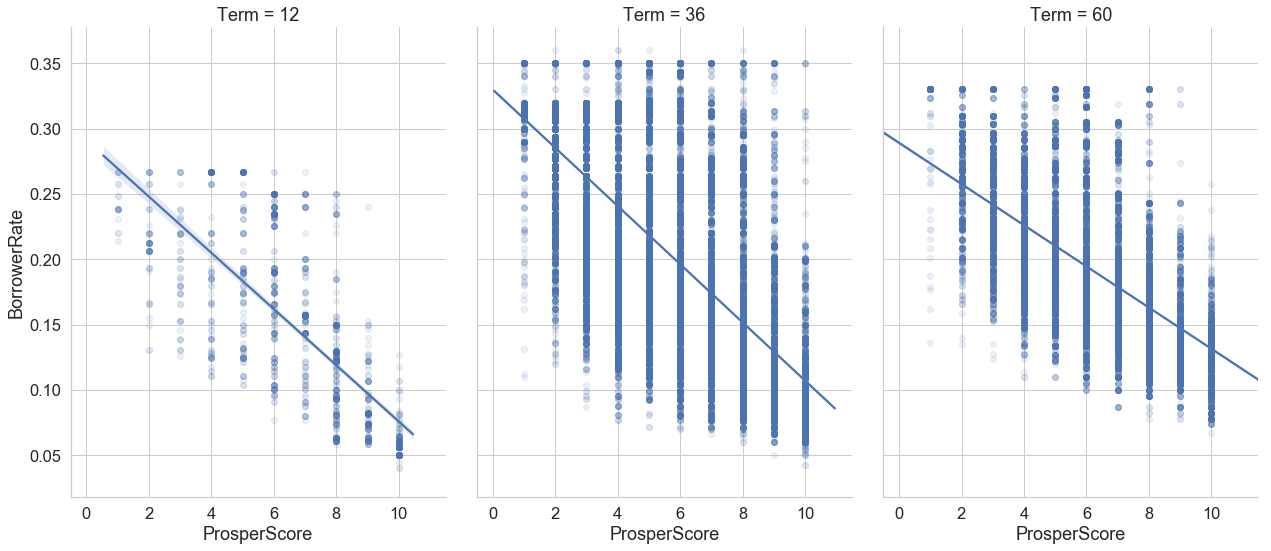

In [7]:
# Regresion plots by fecetgrid for term values 12, 36 and 60.
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
g = sns.FacetGrid(data = dff, col = 'Term', col_order = [12, 36, 60], col_wrap = 3, height = 8, aspect = 0.75)
g = g.map(sns.regplot, 'ProsperScore', 'BorrowerRate', scatter_kws = {'alpha':0.1})

## Borrower Rate and Term


There is a negative correlation between borrower rate and loan term, this effect needs to be eliminated by holding term constant. Distributions of borrower rates for different terms are given for 2 different score levels, 4 and 8. 

We can say that roughly as term increases borrower rate increases.

Heatmap shows how borrower rate changes as risk credit score and term change. When we move vertically over the table, average value of rates decreases as score increases. Moving from left to right in the same row, if score is greater than 6, rates increase, for scores smaller than or equal to 6, average rate increases from 12-month to 36-month but decreases from 36-month to 60-month.

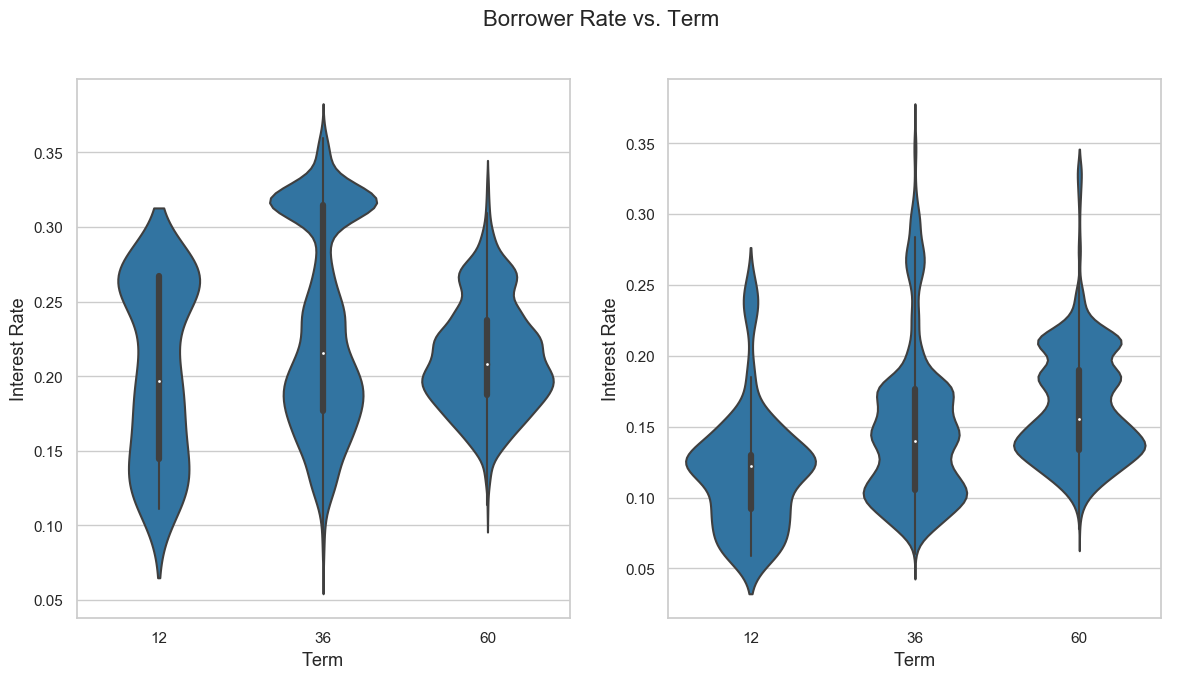

In [11]:
# Borrower Rate vs. Term for different risk scores, 4 and 8.
# First get all samples with risk score 4 and 8 call them plot_data.
# Then plot violinplot of interest rate for different term values.

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
base_color= sns.color_palette()[0]
sns.set(font_scale = 1)
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize = (14,7))
plot_data6 = dff[dff.ProsperScore == 4]
sns.violinplot(data = plot_data6, x = 'Term', y = 'BorrowerRate', ax = axes[0], color = base_color);
axes[0].set_xlabel('Term', fontsize = 13)
axes[0].set_ylabel('Interest Rate', fontsize = 13)

plot_data8 = dff[dff.ProsperScore == 8]
sns.violinplot(data = plot_data8, x = 'Term', y = 'BorrowerRate', ax = axes[1], color = base_color);
axes[1].set_xlabel('Term', fontsize = 13)
axes[1].set_ylabel('Interest Rate', fontsize = 13)
plt.suptitle('Borrower Rate vs. Term', fontsize = 16);

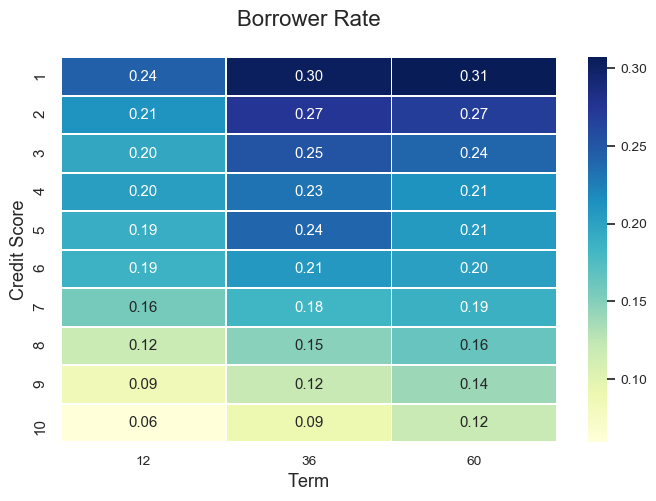

In [14]:
# Heatmap showing the mean interest rate values for different credit risk score and term values.
# First create crosstab and then plot it.
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # to go back to default settings
plt.figure(figsize = (8, 5))
sns.set(font_scale = .9)
crosstab = pd.crosstab(dff['ProsperScore'], dff['Term'], values = dff['BorrowerRate'], aggfunc = 'mean');
sns.heatmap(crosstab, annot = True, fmt = '.2f', cmap= 'YlGnBu', linewidths= .5);

# Polishing the plot. Showing scores as an integer instead of float on the y axis, 10 instead of 10.0 and
# setting title and labels
ticks = np.arange(0.5, 9.5+1, 1)
labels = ['%d' % (i+1) for i in ticks]
plt.yticks(ticks, labels, fontsize = 11);
plt.title('Borrower Rate\n', fontsize = 16);
plt.xlabel('Term', fontsize = 13)
plt.ylabel('Credit Score', fontsize = 13);

## Borrower Rate and Original Loan Amount



There is a negative correlation between loan amount and borrower rate. As loan amount increases, the range of borrower rates get  smaller, upper end of that range moves downward. It might happen because large loans are only given to customers with good score and that's why we see lower rates for larger loans. 

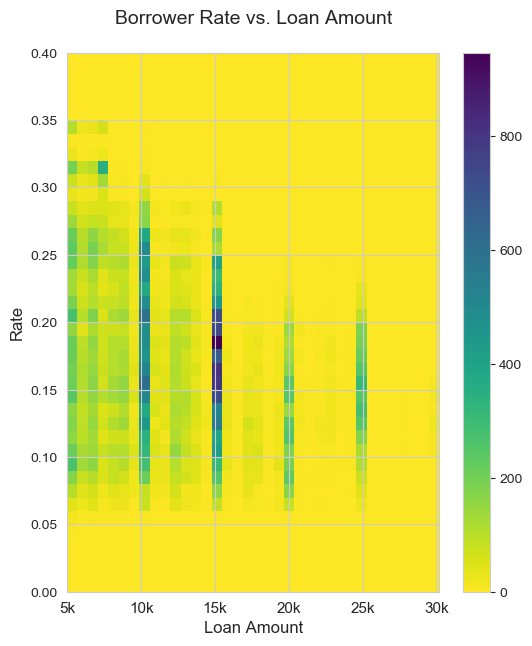

In [68]:
# 2 dimensional histogram of LoanOriginalAmount and BorrowerRate.
plt.figure(figsize = (6, 7))
x_bins = np.arange(5000, 30000+500, 700)
y_bins = np.arange(0, 0.4+0.01, 0.01)
plt.hist2d(data = dff, x = 'LoanOriginalAmount', y = 'BorrowerRate', bins = [x_bins, y_bins], cmap= 'viridis_r');
plt.colorbar();

# Setting title, labels and ticks on the x-axis.
plt.xlabel('Loan Amount', fontsize = 12)
plt.ylabel('Rate', fontsize = 12)
plt.title('Borrower Rate vs. Loan Amount\n', fontsize = 14);

# Polishing here. 5k instead of 5000 on the x-axis.
ticks = np.arange(5000, 30000 + 5000, 5000)
labels = ['5k', '10k', '15k', '20k', '25k', '30k']
plt.xticks(ticks, labels, fontsize = 11);

## Borrower Rate and Debt to Income Ratio

For debt to income ratio values between 5% and 25%, there are loans borrowed at any rate between 6% and 32%. But when debt ratio exceeds 35%, the lower end of borrower rate increases in the histogram. It basically says, the smallest interest rate the borrowers pay increases as the debt ratio increases when the debt ratio is larger 35%. The largest interest rate does not change with debt ratio and it is 32%. 
 
So there is a positive correlation between debt ratio and borrower's rate.

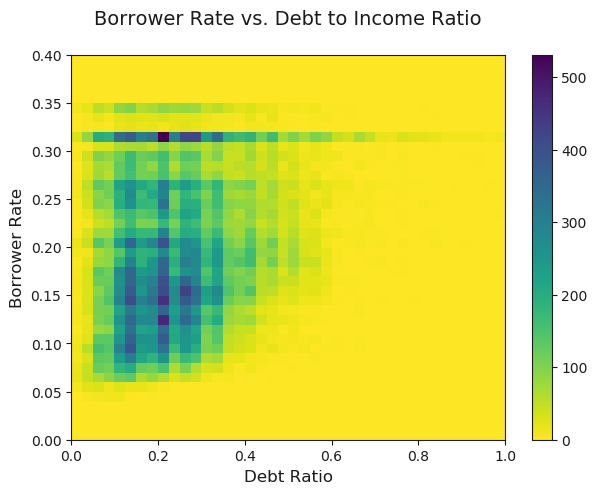

In [20]:
# Histogram of interest rate and debt to income ratio.
# To be able to best depict the relationship between variables,
# debt ratio up to 1 is taken since the percentage of values greater
# than one is tiny.

plt.figure(figsize = (7,5))
x_bins = np.arange(0, 1+0.025, 0.025)
y_bins = np.arange(0, 0.4+0.01, 0.01)
plt.hist2d(data = dff, y = 'BorrowerRate', x = 'DebtToIncomeRatio', bins = [x_bins, y_bins], cmap= 'viridis_r');
plt.colorbar();

# Setting title, ticks and labels
plt.xlabel('Debt Ratio', fontsize = 12)
plt.ylabel('Borrower Rate',fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Borrower Rate vs. Debt to Income Ratio\n', fontsize = 14);

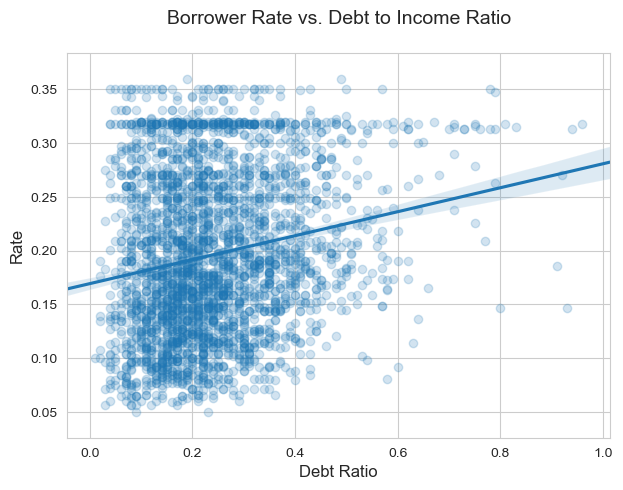

In [23]:
# Regression plot of debt ratio and interest rate
# To be able to best depict the relationship between variables,
# debt ratio up to 1 is taken since the percentage of values greater
# than one is tiny.

sns.set_style('whitegrid')
plt.figure(figsize = (7, 5))
plot_data = dff[dff.DebtToIncomeRatio < 1].sample(3000)
sns.regplot(data = plot_data, x = 'DebtToIncomeRatio', y = 'BorrowerRate',
           scatter_kws = {'alpha': 0.2}, color = base_color);
plt.xlabel('Debt Ratio',fontsize = 12)
plt.ylabel('Rate',fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Borrower Rate vs. Debt to Income Ratio\n', fontsize = 14);

## Borrower Rate and Current Credit Lines


There is no obvious relationship between variables in histogram. In the point plot, as credit lines increases until 10, the average borrower rate decreases, from 11 to 26 te rate remains steady, after 26, there is no clear relationship between two.

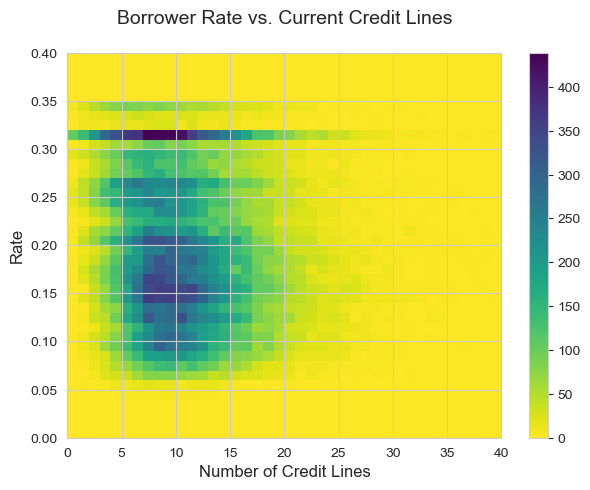

In [25]:
plt.figure(figsize = (7, 5))
x_bins = np.arange(0, 40+1, 1)
y_bins = np.arange(0, 0.4+0.01, 0.01)
plt.hist2d(data = dff, y = 'BorrowerRate', x = 'CurrentCreditLines', bins = [x_bins, y_bins], cmap= 'viridis_r');
plt.colorbar();
plt.xlabel('Number of Credit Lines',fontsize = 12)
plt.ylabel('Rate',fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Borrower Rate vs. Current Credit Lines\n', fontsize = 14);

## Correlation Matrix



The correlation matrix gives the Pearson correlation coefficients. It is seen that borrower rate is positively correlated with the number of inquiries in last 6 months, debt to income ratio, and negatively correlated to employment status duration, loan amount, current credit lines and monthly income.

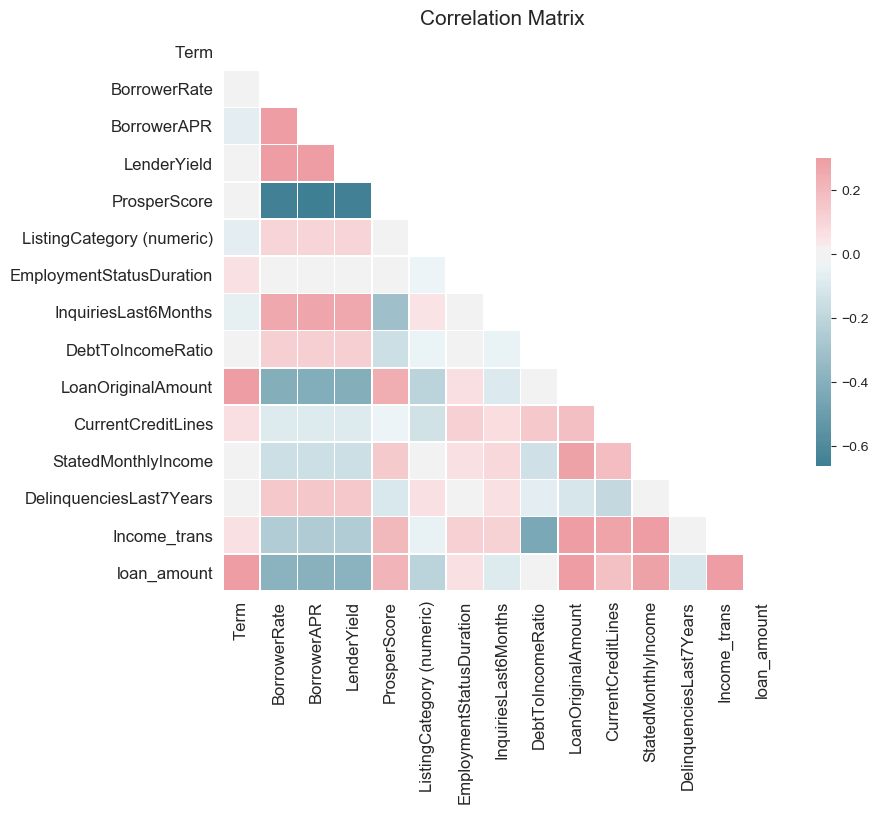

In [27]:
# Heatmap of Correlation Matrix of Pearson coefficients
d = dff
corr = d.corr()  # Correlation Matrix
mask = np.zeros_like(corr, dtype = np.bool) # Mask to see only the lower part of the correlation matrix as it is symmetric
                                            # there will be no loss of information and it makes reading easier.
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize = (9, 8))
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0, square = True, 
            linewidths = 0.5, cbar_kws = {'shrink':0.5});
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.title('Correlation Matrix', fontsize = 15);

## Correlation with Borrower Rate



The price the borrower pays for the loan (borrower's rate) decreases as

- credit risk score of the borrower increases (for different term values)

- stated monthly income increases,

- the debt to income ratio falls,

- the number of current credit lines increases up to 10, after this value there is no clear correlation

- the loan original amount increases

- the term of the loan decreases when the credit score is greater than 6. For scores smaller than 6, borrower's rate decreases as term increases from 36 months to 60 months

- the number of inquiries in the last 6 months decreases.

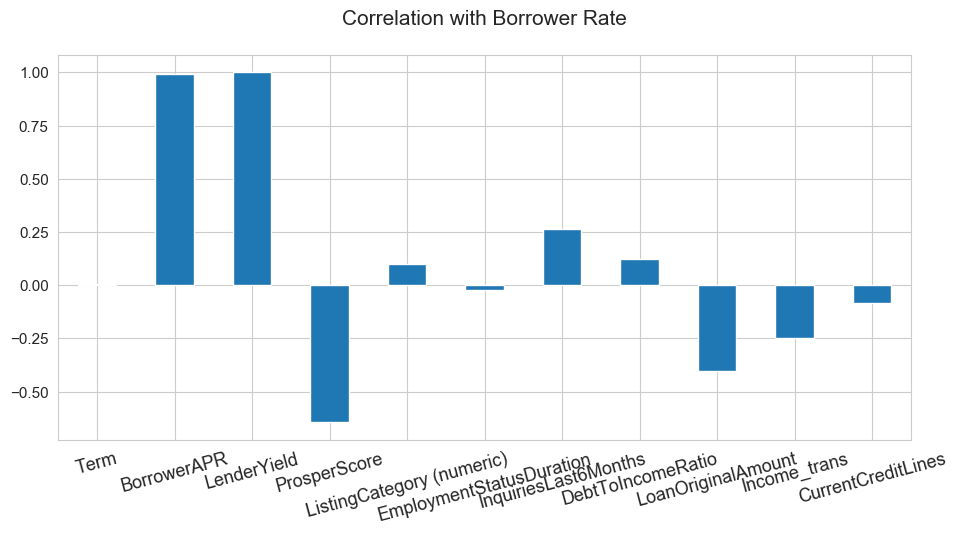

In [60]:
# Correlation of other variables in the dataset with Borrower Rate
new_cols = ['Term', 'BorrowerAPR', 'LenderYield', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'InquiriesLast6Months', 'DebtToIncomeRatio', 
        'LoanOriginalAmount', 'Income_trans', 'CurrentCreditLines']
sns.set_style('whitegrid')
plt.figure(figsize =(11, 5))
dff[new_cols].corrwith(dff['BorrowerRate']).plot(kind = 'bar',  color = base_color,
                                      grid = True);
plt.title('Correlation with Borrower Rate\n', fontsize= 15)
plt.xticks(rotation = 15, fontsize = 13);
plt.yticks(fontsize = 11);

# Are there differences between loans depending on how large the original loan amount was?

## Loan Amount and Term

As term increases, the mean value of loan amounts gets larger.

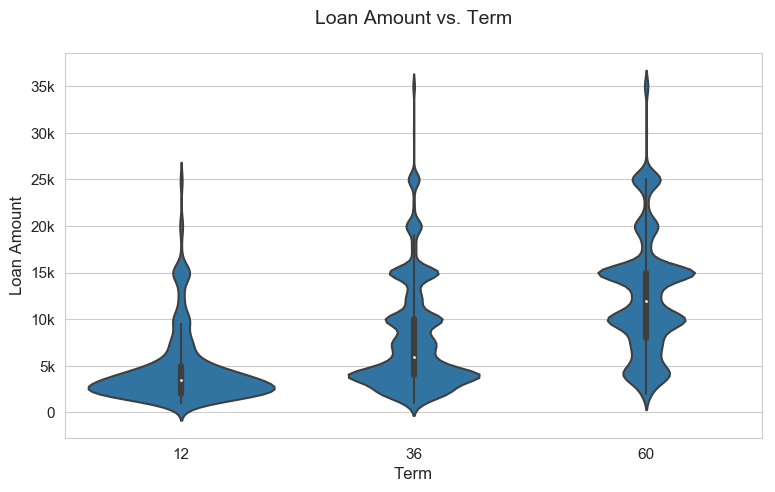

In [34]:
# Violin plot of term and loan amount
plt.figure(figsize = (9, 5))
sns.violinplot(data = dff, x = 'Term', y = 'LoanOriginalAmount', color = base_color);

# Setting title, labels and ticks. Showing 5k instead of 5000 on the x-axis
plt.title('Loan Amount vs. Term\n', fontsize = 14);
ticks = np.arange(0, 35000 + 5000, 5000)
labels = ['0', '5k', '10k', '15k', '20k', '25k', '30k', '35k']
plt.yticks(ticks, labels, fontsize = 11);
plt.xticks(fontsize = 11)
plt.ylabel('Loan Amount', fontsize = 12);
plt.xlabel('Term', fontsize = 12);

## Loan Amount and Borrower Rate


As loan amount increases, the average borrower rate decreases.

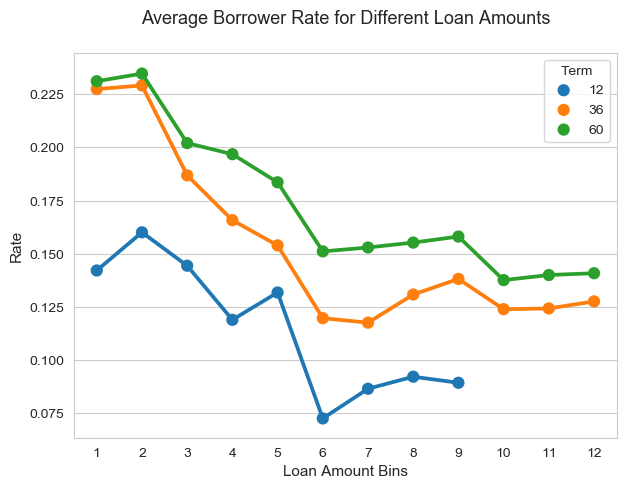

In [64]:
# Point plot of loan amount and interest rate for different term values
plt.figure(figsize = (7, 5))
sns.pointplot(data = dff, x = 'loan_amount', y = 'BorrowerRate', hue = 'Term', ci = None);
plt.xlabel('Loan Amount Bins', fontsize = 11);
plt.title('Average Borrower Rate for Different Loan Amounts\n', fontsize = 13);
plt.ylabel('Rate', fontsize = 11);
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

When term increases, the borrower rate range for the same amount of loan shifts above. As loan amounts increase for the same term, the upper end of borrower rate decreases. It means, for small loans, as term increases interest rate for the same loan amount increases for borrowers. But for the same term, as loan amount increases, upper end of borrower rate range decreases. In conclusion, as loan amoount increases, interest rate  decreases.

It is also apparent that most of the loans with 12 month term are loans smaller than 5k whereas for 60 month loans, most people borrow loans at multiple of 5k like 10, 15, 20, 25k.

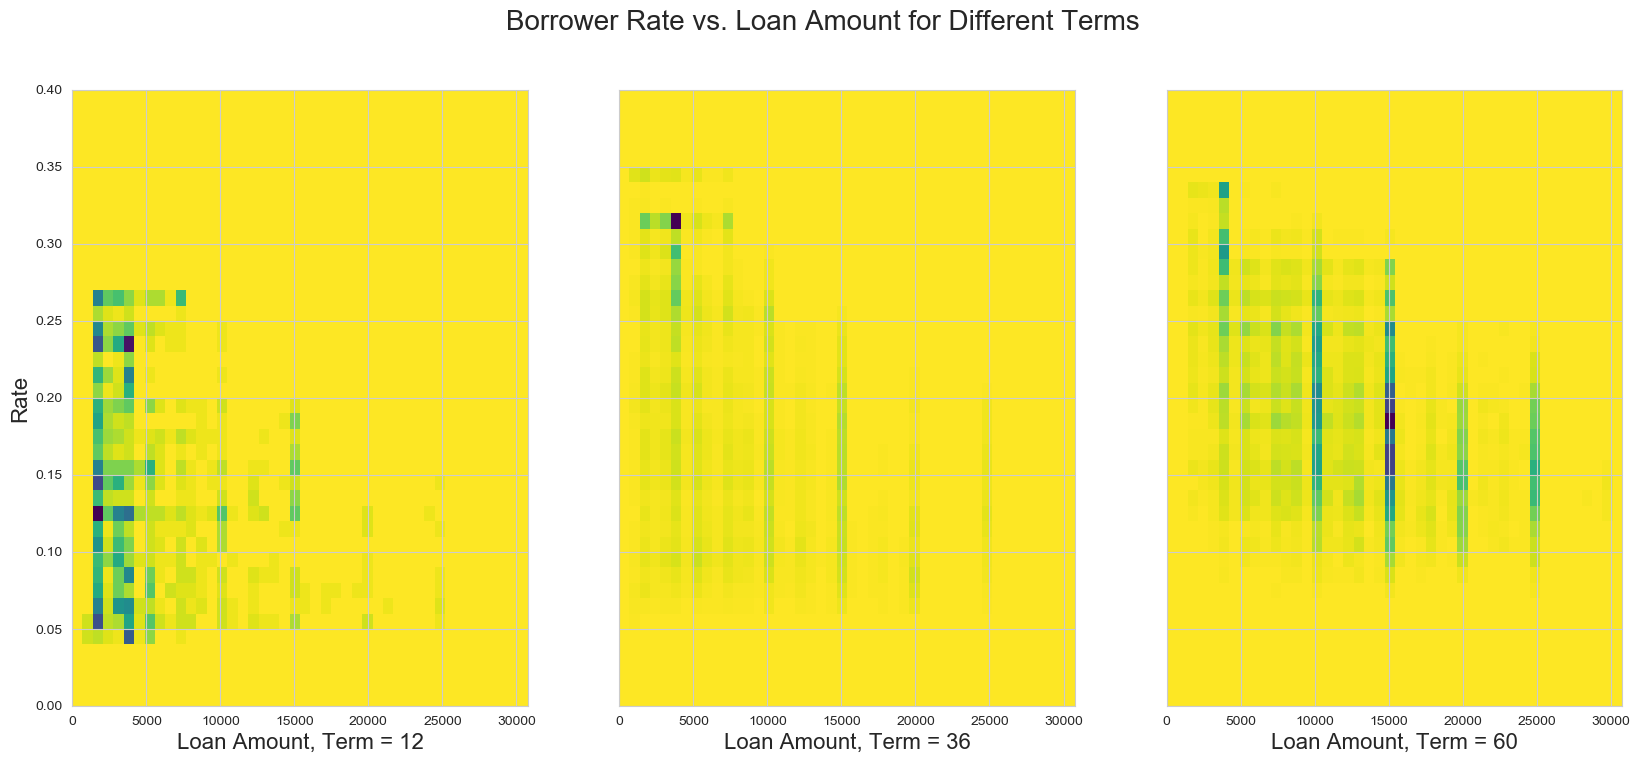

In [39]:
# 3 histograms for 3 different term values
fig, ax= plt.subplots(1, 3, sharey = True, figsize = (20, 8));
x_bins = np.arange(0,30000+1000, 700)  # Setting bins for x-axis and y-axis
y_bins = np.arange(0, 0.4+0.01, 0.01)
# Adding subplots
ax[0].hist2d(data = dff[dff.Term == 12], x = 'LoanOriginalAmount', y = 'BorrowerRate', 
             bins = [x_bins, y_bins], cmap = 'viridis_r');

ax[1].hist2d(data = dff[dff.Term == 36], x = 'LoanOriginalAmount', y = 'BorrowerRate', 
             bins = [x_bins, y_bins], cmap = 'viridis_r');

ax[2].hist2d(data = dff[dff.Term == 60], x = 'LoanOriginalAmount', y = 'BorrowerRate', 
             bins = [x_bins, y_bins], cmap = 'viridis_r');

# Setting ticks onx-axis
ticks = np.arange(0, 30000 + 5000, 5000);
labels = ['0', '5k', '10k', '15k', '20k', '25k', '30k'];

ax[0].set_ylabel('Rate', fontsize = 16);

for i in range(3):
    ax[i].set_xticks(ticks, labels);
    
ax[0].set_xlabel('Loan Amount, Term = 12', fontsize = 16);
ax[1].set_xlabel('Loan Amount, Term = 36', fontsize = 16);
ax[2].set_xlabel('Loan Amount, Term = 60', fontsize = 16);
plt.suptitle('Borrower Rate vs. Loan Amount for Different Terms', fontsize = 20);

## Loan Amount and Income


As the loan amount increases, the lower end of income range shifts upward. It basically says the monthly income of borrower who take out larger loans are greater than the ones of borrowers who borrow smaller loans. In other words, larger loans are taken out by people with high income.

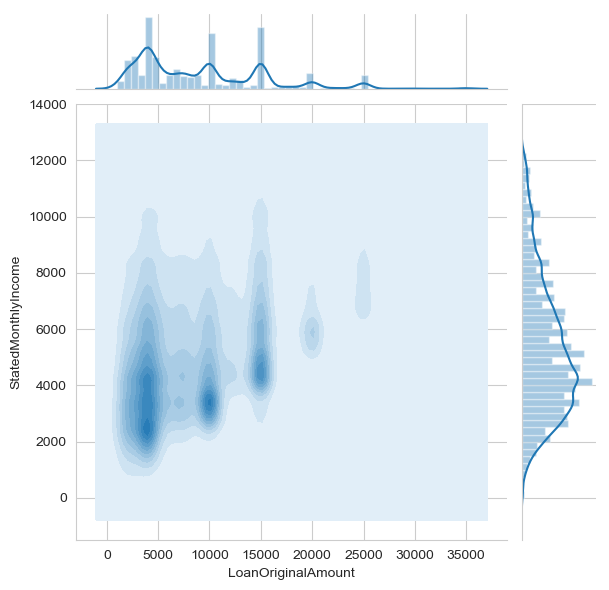

In [40]:
# Joint Plot of loan amount and income
# cutting the outliers in income,taking only values with income at most 13k

g = sns.JointGrid(data = dff[dff.StatedMonthlyIncome < 12500], x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome')
g = g.plot_joint(sns.kdeplot, shade = True)
g = g.plot_marginals(sns.distplot)

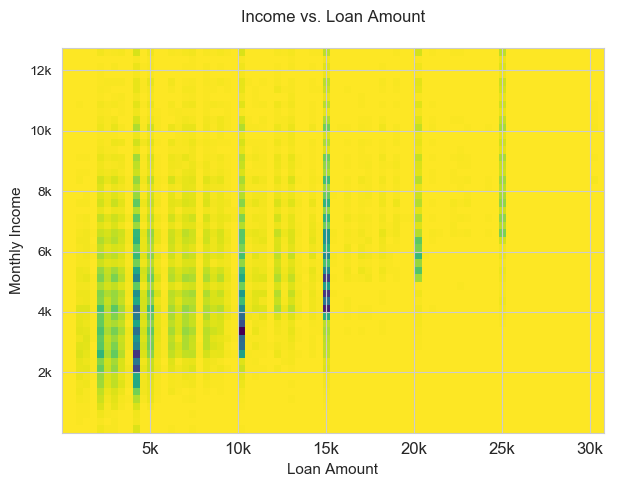

In [43]:
# Histogram of loan amount and income
# setting bins on the x-axis and y-axis
plt.figure(figsize = (7, 5))
x_bins = np.arange(0, 30000 + 1000, 400)
y_bins = np.arange(0, 12500 + 500, 250)


plt.hist2d(data = dff, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', bins = [x_bins, y_bins], 
          cmap = 'viridis_r');
# Polishing the graph. Showing 10k instead of 10000 on the axes
ticks = np.arange(5000, 30000 + 5000, 5000)
labels = ['5k', '10k', '15k', '20k', '25k', '30k']
plt.xticks(ticks, labels, fontsize = 12);

ticks_y = np.arange(2000, 12000 + 2000, 2000)
labels_y = ['2k', '4k', '6k', '8k', '10k', '12k']
plt.yticks(ticks_y, labels_y, fontsize = 10);
plt.xlabel('Loan Amount', fontsize = 11)
plt.ylabel('Monthly Income', fontsize = 11)
plt.title('Income vs. Loan Amount\n', fontsize = 12);

## Loan Amount and Credit Score


As the loan amount increases, the lower end of credit risk score range shifts upward. It means that as loans get larger, the credit score of borrowers who get these loans get larger. So there is a positive correlation between loan amount and credit risk score.

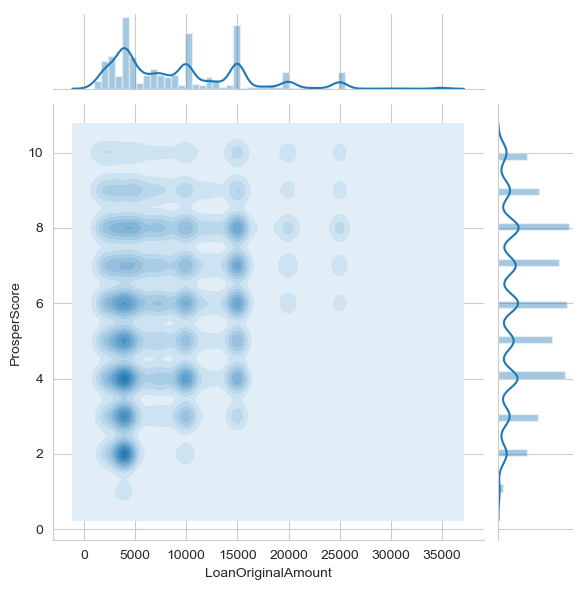

In [44]:
# The histogram of loan amount and credit risk score on the edges
# The bivariate kernel density estimation plot at the joint 

g = sns.JointGrid(data = dff, x = 'LoanOriginalAmount', y = 'ProsperScore')
g = g.plot_joint(sns.kdeplot, shade = True)
g = g.plot_marginals(sns.distplot)

Large loans (loans greater than 15k) are given to people whose credit score is high. The credit score distribution is left-skewed. It basically means that large loans are not given to (or not borrowed by) people with low credit scores. That is probably the reason why we see a negative correlation between loan amount and interest rate.

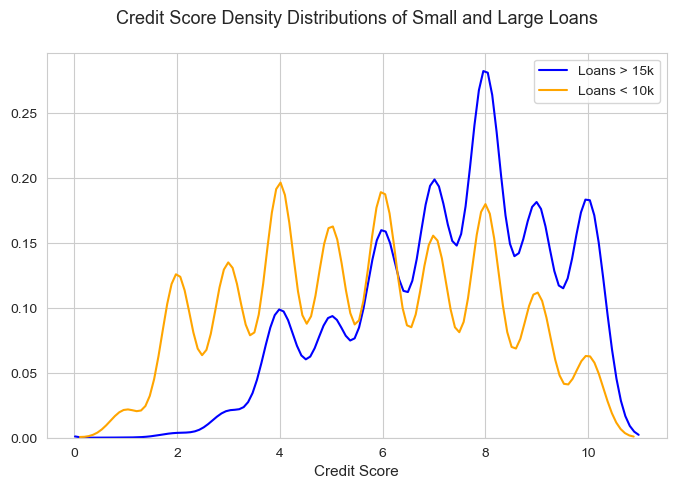

In [56]:
# Density distributions of credit score of people who borrow small and large loans.
plt.figure(figsize = (8, 5))
plot_data = dff[dff.LoanOriginalAmount > 15000]  # large loans that are larger than 15k
sns.kdeplot(plot_data['ProsperScore'], color = 'blue', shade = False);
plot_data2 = dff[dff.LoanOriginalAmount < 10000]  # small loans that are smaller than 10k
sns.kdeplot(plot_data2['ProsperScore'], color = 'orange', shade = False);
# Adding title and labels
plt.xlabel('Credit Score', fontsize = 11)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Credit Score Density Distributions of Small and Large Loans\n', fontsize = 13);
# changing the text in the legend
L = plt.legend()
L.get_texts()[0].set_text('Loans > 15k')
L.get_texts()[1].set_text('Loans < 10k');

## Loan Amount and Debt to Income Ratio


For 12-month loans there is a positive correlation between loan amount and debt ratio. For 3 and 5-year loans, the correlation is negative. From joint plot below, for very large loan amounts debt ratio is around 20%. For small amounts, debt ratio is between 0 and 60%. So the plots are indecisive about the relationship between loan amount and debt ratio.

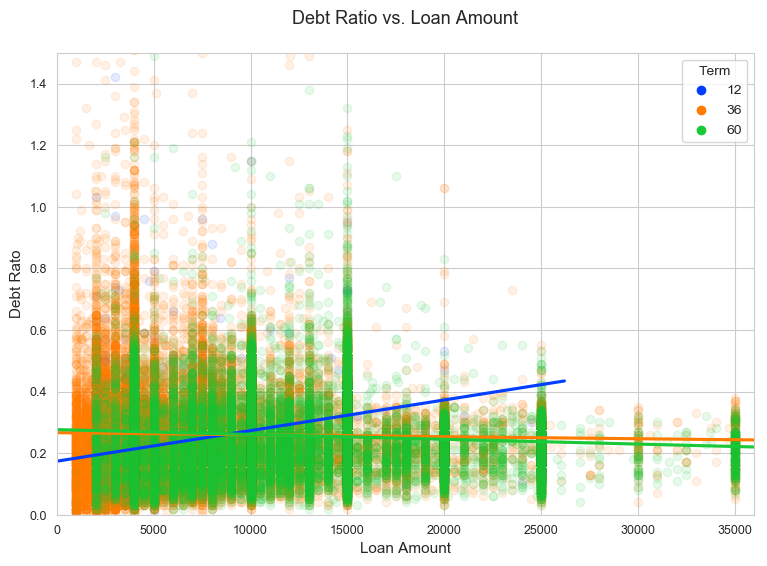

In [47]:
# Regression plot of loan amount and debt to income ratio for term values of 12, 36 and 60
# select the plot_data first whose term is equal to 12, 36 or 60 and then
# plot it with different color.
plt.figure(figsize = (9, 6))
colors = sns.color_palette('bright', 3)
for i, color in zip([12, 36, 60], colors):
    plot_data = dff[dff.Term == i]
    sns.regplot(data = plot_data, x = 'LoanOriginalAmount', y = 'DebtToIncomeRatio', color = color, ci = None, 
               scatter_kws = {'alpha':0.1})
plt.ylim(0, 1.5)
plt.xlim(0,36000)

# creating the legend object
legend_obj = []
for color in colors:
    legend_obj.append(plt.scatter([], [], color = color))
plt.legend(legend_obj, ['12', '36', '60'], title = 'Term');
# Adding title and labels
plt.xlabel('Loan Amount', fontsize = 11)
plt.ylabel('Debt Rato', fontsize = 11)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.title('Debt Ratio vs. Loan Amount\n', fontsize = 13);

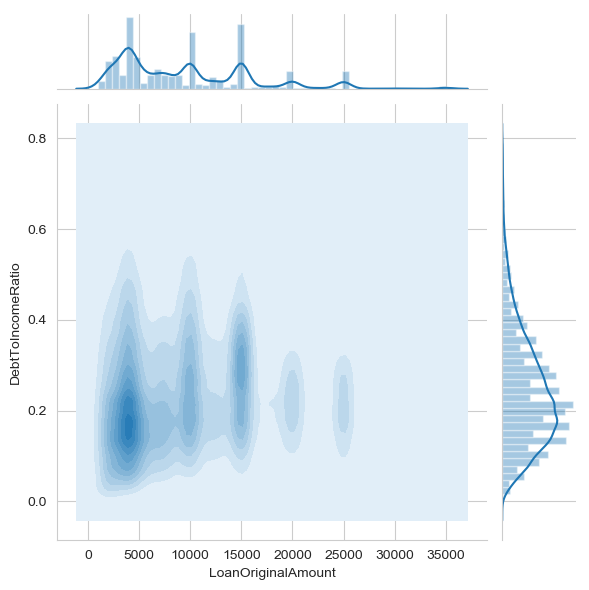

In [48]:
# PLotting kdeplot of loan amount and debt to income ratio
plot_data = dff[dff.DebtToIncomeRatio < 0.8]
g = sns.JointGrid(data = plot_data, x = 'LoanOriginalAmount', y = 'DebtToIncomeRatio')
g = g.plot_joint(sns.kdeplot, shade = True)
g = g.plot_marginals(sns.distplot)

## Correlation with Loan Amount




- Loans with a large original loan amount have a longer term; while small loans have 12 months term, large loans have 36 or 60 months terms.

- While small loans can be of any value, large loans are mostly multiples of 5k, ie. 10k, 15k, 20k, 25k...

- For each term value, the price of the loan gets smaller as the loan amount increases. So large loans generally have smaller interest rates compared to smaller loans.

- The stated monthly income of borrowers who can take out large loans are larger compared to those of borrowers who take smaller loans

- Larger loans require good credit scores. For instance, borrower needs to have a credit score of at least 5 to get a loan of 30k or 35k. That s probably the reason why we see a negative correlation between loan amount and interest rate. 

- The debt to income ratios of borrowers who get larger loans are generally lower compared to those who get smaller loans.

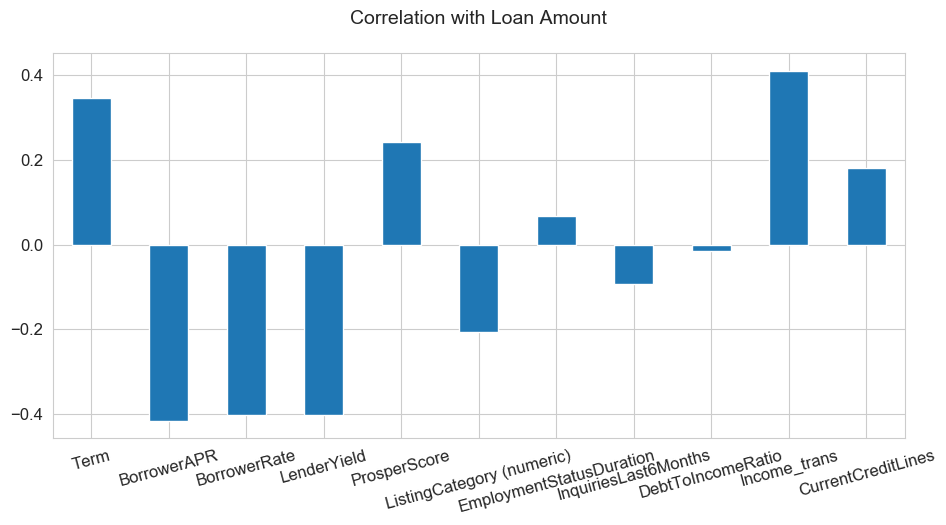

In [53]:
sns.set_style('whitegrid')
new_cols = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'InquiriesLast6Months', 'DebtToIncomeRatio', 
        'Income_trans', 'CurrentCreditLines']   # the columns I want to see in the plot
sns.set_style('whitegrid')
plt.figure(figsize =(11,5))
dff[new_cols].corrwith(dff['LoanOriginalAmount']).plot(kind = 'bar',  color = base_color,
                                      grid = True);
plt.xticks(rotation = 15, fontsize = 12);
plt.yticks(fontsize = 12);
plt.title('Correlation with Loan Amount\n', fontsize = 14);